In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
df_hh=pd.read_csv("hh_info.csv")

In [3]:
df_hh.head()

,hhid,common_id,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,nic_code,nco_code,hh_type,religion,social_group,latrine_use,...,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,0015000075250122012323034220131101,3,2,49224.0,121,1,1,9,2,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001102,0015000075250122012323034220131102,4,2,7100.0,931,3,1,1,2,...,1,2.0,2,0.0,8000,23,3,2,119.945,239.89
2,500001201,0015000075250122012323034220131201,6,2,56101.0,121,1,1,9,1,...,2,2.0,1,0.0,32000,23,3,2,149.930,299.86
3,500001202,0015000075250122012323034220131202,5,2,7100.0,811,2,1,1,1,...,2,2.0,2,NaN,29800,23,3,2,149.930,299.86
4,500001203,0015000075250122012323034220131203,2,2,7100.0,931,3,1,1,2,...,1,2.0,1,0.0,6000,23,3,2,149.930,299.86


In [4]:
df_hh =df_hh.drop('common_id',axis=1)

In [5]:
df_hh.isnull().sum()

hhid                                                         0
hh_size                                                      0
paid_share_childbirth_expen_for_non_HHD_female_member        0
nic_code                                                  8140
nco_code                                                  8140
hh_type                                                      0
religion                                                     0
social_group                                                 0
latrine_use                                                  0
acc_to_latrine                                           17398
members_use_latrine                                      17399
src_drinking_water                                           0
arrangement_garbage_disposal                                 0
src_of_energy_cooking                                        1
outbreak_comm_disease                                        0
med_insurance_premium                                  

In [6]:
df_hh["med_insurance_premium"] = df_hh["med_insurance_premium"].fillna(df_hh["med_insurance_premium"]. median())

In [7]:
df_hh["acc_to_latrine"] = df_hh["acc_to_latrine"].fillna(df_hh["acc_to_latrine"]. median())
df_hh["members_use_latrine"] = df_hh["members_use_latrine"].fillna(df_hh["members_use_latrine"]. median())

In [8]:
df_hh = df_hh.drop('nic_code', axis=1)

In [9]:
df_hh = df_hh.drop('nco_code', axis=1)

In [10]:
df_hh.isnull().sum()

hhid                                                     0
hh_size                                                  0
paid_share_childbirth_expen_for_non_HHD_female_member    0
hh_type                                                  0
religion                                                 0
social_group                                             0
latrine_use                                              0
acc_to_latrine                                           0
members_use_latrine                                      0
src_drinking_water                                       0
arrangement_garbage_disposal                             0
src_of_energy_cooking                                    1
outbreak_comm_disease                                    0
med_insurance_premium                                    0
hh_consumer_expen                                        0
stratum                                                  0
substratum                                              

In [11]:
df_hh.weight_sc=df_hh.weight_sc.round()

In [12]:
df_hh.weight_ss=df_hh.weight_ss.round()

In [13]:
df_hh["src_of_energy_cooking"] = df_hh["src_of_energy_cooking"].fillna(df_hh["src_of_energy_cooking"]. median())

In [14]:
df_hh.head()

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,3,2,1,1,9,2,1.0,2.0,4,2,2.0,2,0.0,16500,23,3,2,120.0,240.0
1,500001102,4,2,3,1,1,2,1.0,3.0,4,1,2.0,2,0.0,8000,23,3,2,120.0,240.0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,2,2.0,1,0.0,32000,23,3,2,150.0,300.0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,2,2.0,2,0.0,29800,23,3,2,150.0,300.0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,1,2.0,1,0.0,6000,23,3,2,150.0,300.0


In [15]:
df = pd.read_csv("data.csv")

In [16]:
df.head()

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89


In [17]:
df.shape

(727311, 153)

In [18]:
df.columns

Index(['hhid', 'case_id', 'person_id', 'case_type', 'age', 'gender',
       'is_alive', 'ailment_nature', 'treatment_nature', 'type_of_inst',
       ...
       'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss'],
      dtype='object', length=153)

In [19]:
df.isnull().sum()

hhid          0
case_id       0
person_id     0
case_type     0
age           0
             ..
stratum       0
substratum    0
subsample     0
weight_sc     0
weight_ss     0
Length: 153, dtype: int64

In [20]:
#df[tot_expen] = prenatal+postnatal+immunisation+delievry
col_list= ['prenatal_care_total_expenditure', 'immunisation_expenditure_last_365_days', 'delivery_expenditure_home','postnatal_care_expenditure']
df['tot_expen'] = df[col_list].sum(axis=1)

In [21]:
col_list= ['expenditure','total_expenditure_Rs','tot_expen']
df['final_expenditure'] = df[col_list].sum(axis=1)

In [22]:
col_list_hh_loss = ['hh_income_loss_Rs','loss_of_hh_income_due_to_hospitalisation']
df['final_hh_loss'] =df[col_list_hh_loss].sum(axis=1)

In [23]:
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,0.0,0.0,0.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,10800.0,10800.0,0.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,10830.0,10830.0,0.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,0.0,16500,23,3,2,119.945,239.89,0.0,29700.0,5600.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,100.0,100.0,0.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,0.0,8000,17,3,1,29.905,59.81,0.0,4800.0,0.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,0.0,0.0,0.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,0.0,0.0,0.0


In [24]:
col_list_reim = ['total_amount_reimbursed_Rs','total_amt_reimb_by_med_insurance']
df['final_reim_amt'] =df[col_list_reim].sum(axis=1)

In [25]:
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,0.0,0.0,0.0,0.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,10800.0,10800.0,0.0,0.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,10830.0,10830.0,0.0,0.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,16500,23,3,2,119.945,239.89,0.0,29700.0,5600.0,0.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,100.0,100.0,0.0,0.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,8000,17,3,1,29.905,59.81,0.0,4800.0,0.0,0.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,0.0,0.0,0.0,0.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,0.0,0.0,0.0,0.0


In [26]:
df = df.assign(oope1=df['final_expenditure']-df['final_reim_amt'])
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt,oope1
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,0.0,0.0,0.0,0.0,0.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,10800.0,10800.0,0.0,0.0,10800.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,10830.0,10830.0,0.0,0.0,10830.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,23,3,2,119.945,239.89,0.0,29700.0,5600.0,0.0,29700.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,100.0,100.0,0.0,0.0,100.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,17,3,1,29.905,59.81,0.0,4800.0,0.0,0.0,4800.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,0.0,0.0,0.0,0.0,0.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,0.0,0.0,0.0,0.0,0.0


In [27]:
df = df.assign(oope2=df['final_expenditure']+df['final_hh_loss']-df['final_reim_amt'])
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt,oope1,oope2
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,0.0,0.0,0.0,0.0,0.0,0.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,10800.0,10800.0,0.0,0.0,10800.0,10800.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,10830.0,10830.0,0.0,0.0,10830.0,10830.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,3,2,119.945,239.89,0.0,29700.0,5600.0,0.0,29700.0,35300.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,100.0,100.0,0.0,0.0,100.0,100.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,3,1,29.905,59.81,0.0,4800.0,0.0,0.0,4800.0,4800.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,0.0,0.0,0.0,0.0,0.0,0.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_oope1 = df.groupby('hhid').apply(lambda x: np.sum(x['oope1']))

In [29]:
df4 = df_oope1.to_frame()
df4 = df4.reset_index(inplace=False)

In [30]:
df4.rename(columns = {0:'OOPE1'}, inplace = True)

In [31]:
df4

,hhid,OOPE1
0,500001101,51330.0
1,500001102,1360.0
2,500001201,14420.0
3,500001202,580.0
4,500001203,10760.0
...,...,...
113818,699991301,0.0
113819,699992101,5334.0
113820,699992201,3725.0
113821,699992202,5650.0


In [32]:
df_oope2 = df.groupby('hhid').apply(lambda x: np.sum(x['oope2']))

In [33]:
df5 = df_oope2.to_frame()
df5 = df5.reset_index(inplace=False)
df5

,hhid,0
0,500001101,56930.0
1,500001102,1760.0
2,500001201,20420.0
3,500001202,580.0
4,500001203,12760.0
...,...,...
113818,699991301,0.0
113819,699992101,8584.0
113820,699992201,9725.0
113821,699992202,9650.0


In [34]:
df5.rename(columns = {0:'OOPE2'}, inplace = True)

In [35]:
df5

,hhid,OOPE2
0,500001101,56930.0
1,500001102,1760.0
2,500001201,20420.0
3,500001202,580.0
4,500001203,12760.0
...,...,...
113818,699991301,0.0
113819,699992101,8584.0
113820,699992201,9725.0
113821,699992202,9650.0


In [36]:
df7 = pd.merge(df4, df5.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df7

,hhid,OOPE1,OOPE2
0,500001101,51330.0,56930.0
1,500001102,1360.0,1760.0
2,500001201,14420.0,20420.0
3,500001202,580.0,580.0
4,500001203,10760.0,12760.0
...,...,...,...
113818,699991301,0.0,0.0
113819,699992101,5334.0,8584.0
113820,699992201,3725.0,9725.0
113821,699992202,5650.0,9650.0


In [37]:
df_hh_final_expen = df.groupby('hhid').apply(lambda x: np.sum(x['final_expenditure']))
df9 = df_hh_final_expen.to_frame()
df9 = df9.reset_index(inplace=False)
df9.rename(columns = {0:'final_expenditure'}, inplace = True)
df9

,hhid,final_expenditure
0,500001101,51330.0
1,500001102,1360.0
2,500001201,14420.0
3,500001202,580.0
4,500001203,10760.0
...,...,...
113818,699991301,0.0
113819,699992101,5334.0
113820,699992201,3725.0
113821,699992202,5650.0


In [38]:
df_hh_final_loss = df.groupby('hhid').apply(lambda x: np.sum(x['final_hh_loss']))
df10 = df_hh_final_loss.to_frame()
df10 = df10.reset_index(inplace=False)
df10.rename(columns = {0:'final_hh_loss'}, inplace = True)
df10

,hhid,final_hh_loss
0,500001101,5600.0
1,500001102,400.0
2,500001201,6000.0
3,500001202,0.0
4,500001203,2000.0
...,...,...
113818,699991301,0.0
113819,699992101,3250.0
113820,699992201,6000.0
113821,699992202,4000.0


In [39]:
df_hh_final_reim_amt = df.groupby('hhid').apply(lambda x: np.sum(x['final_reim_amt']))
df11 = df_hh_final_reim_amt.to_frame()
df11 = df11.reset_index(inplace=False)
df11.rename(columns = {0:'final_reim_amt'}, inplace = True)
df11

,hhid,final_reim_amt
0,500001101,0.0
1,500001102,0.0
2,500001201,0.0
3,500001202,0.0
4,500001203,0.0
...,...,...
113818,699991301,0.0
113819,699992101,0.0
113820,699992201,0.0
113821,699992202,0.0


In [40]:
df7 = pd.merge(df7, df9.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df7

,hhid,OOPE1,OOPE2,final_expenditure
0,500001101,51330.0,56930.0,51330.0
1,500001102,1360.0,1760.0,1360.0
2,500001201,14420.0,20420.0,14420.0
3,500001202,580.0,580.0,580.0
4,500001203,10760.0,12760.0,10760.0
...,...,...,...,...
113818,699991301,0.0,0.0,0.0
113819,699992101,5334.0,8584.0,5334.0
113820,699992201,3725.0,9725.0,3725.0
113821,699992202,5650.0,9650.0,5650.0


In [41]:
df7 = pd.merge(df7, df10.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df7

,hhid,OOPE1,OOPE2,final_expenditure,final_hh_loss
0,500001101,51330.0,56930.0,51330.0,5600.0
1,500001102,1360.0,1760.0,1360.0,400.0
2,500001201,14420.0,20420.0,14420.0,6000.0
3,500001202,580.0,580.0,580.0,0.0
4,500001203,10760.0,12760.0,10760.0,2000.0
...,...,...,...,...,...
113818,699991301,0.0,0.0,0.0,0.0
113819,699992101,5334.0,8584.0,5334.0,3250.0
113820,699992201,3725.0,9725.0,3725.0,6000.0
113821,699992202,5650.0,9650.0,5650.0,4000.0


In [42]:
df7 = pd.merge(df7, df11.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df7

,hhid,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt
0,500001101,51330.0,56930.0,51330.0,5600.0,0.0
1,500001102,1360.0,1760.0,1360.0,400.0,0.0
2,500001201,14420.0,20420.0,14420.0,6000.0,0.0
3,500001202,580.0,580.0,580.0,0.0,0.0
4,500001203,10760.0,12760.0,10760.0,2000.0,0.0
...,...,...,...,...,...,...
113818,699991301,0.0,0.0,0.0,0.0,0.0
113819,699992101,5334.0,8584.0,5334.0,3250.0,0.0
113820,699992201,3725.0,9725.0,3725.0,6000.0,0.0
113821,699992202,5650.0,9650.0,5650.0,4000.0,0.0


In [43]:
df8 = pd.merge(df_hh, df7.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,stratum,substratum,subsample,weight_sc,weight_ss,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,23,3,2,120.0,240.0,51330.0,56930.0,51330.0,5600.0,0.0
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,23,3,2,120.0,240.0,1360.0,1760.0,1360.0,400.0,0.0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,23,3,2,150.0,300.0,14420.0,20420.0,14420.0,6000.0,0.0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,23,3,2,150.0,300.0,580.0,580.0,580.0,0.0,0.0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,23,3,2,150.0,300.0,10760.0,12760.0,10760.0,2000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,18,2,2,3234.0,6468.0,0.0,0.0,0.0,0.0,0.0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,18,2,2,211.0,422.0,5334.0,8584.0,5334.0,3250.0,0.0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,18,2,2,738.0,1476.0,3725.0,9725.0,3725.0,6000.0,0.0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,18,2,2,738.0,1476.0,5650.0,9650.0,5650.0,4000.0,0.0


In [44]:
conditions1 = [(df8['OOPE1']>=0.05*df8['hh_consumer_expen']*12), (df8['OOPE1']<0.05*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_1_5']= np.select(conditions1, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,substratum,subsample,weight_sc,weight_ss,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,3,2,120.0,240.0,51330.0,56930.0,51330.0,5600.0,0.0,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,3,2,120.0,240.0,1360.0,1760.0,1360.0,400.0,0.0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,3,2,150.0,300.0,14420.0,20420.0,14420.0,6000.0,0.0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,3,2,150.0,300.0,580.0,580.0,580.0,0.0,0.0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,3,2,150.0,300.0,10760.0,12760.0,10760.0,2000.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,2,2,3234.0,6468.0,0.0,0.0,0.0,0.0,0.0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,2,2,211.0,422.0,5334.0,8584.0,5334.0,3250.0,0.0,1
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,2,2,738.0,1476.0,3725.0,9725.0,3725.0,6000.0,0.0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,2,2,738.0,1476.0,5650.0,9650.0,5650.0,4000.0,0.0,1


In [45]:
conditions2 = [(df8['OOPE1']>=0.1*df8['hh_consumer_expen']*12), (df8['OOPE1']<0.1*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_1_10']= np.select(conditions2, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,subsample,weight_sc,weight_ss,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,2,120.0,240.0,51330.0,56930.0,51330.0,5600.0,0.0,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,2,120.0,240.0,1360.0,1760.0,1360.0,400.0,0.0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,2,150.0,300.0,14420.0,20420.0,14420.0,6000.0,0.0,0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,2,150.0,300.0,580.0,580.0,580.0,0.0,0.0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,2,150.0,300.0,10760.0,12760.0,10760.0,2000.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,2,3234.0,6468.0,0.0,0.0,0.0,0.0,0.0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,2,211.0,422.0,5334.0,8584.0,5334.0,3250.0,0.0,1,0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,2,738.0,1476.0,3725.0,9725.0,3725.0,6000.0,0.0,0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,2,738.0,1476.0,5650.0,9650.0,5650.0,4000.0,0.0,1,0


In [46]:
conditions3 = [(df8['OOPE1']>=0.15*df8['hh_consumer_expen']*12), (df8['OOPE1']<0.15*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_1_15']= np.select(conditions3, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,weight_sc,weight_ss,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,120.0,240.0,51330.0,56930.0,51330.0,5600.0,0.0,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,120.0,240.0,1360.0,1760.0,1360.0,400.0,0.0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,150.0,300.0,14420.0,20420.0,14420.0,6000.0,0.0,0,0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,150.0,300.0,580.0,580.0,580.0,0.0,0.0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,150.0,300.0,10760.0,12760.0,10760.0,2000.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,3234.0,6468.0,0.0,0.0,0.0,0.0,0.0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,211.0,422.0,5334.0,8584.0,5334.0,3250.0,0.0,1,0,0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,738.0,1476.0,3725.0,9725.0,3725.0,6000.0,0.0,0,0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,738.0,1476.0,5650.0,9650.0,5650.0,4000.0,0.0,1,0,0


In [47]:
conditions4 = [(df8['OOPE1']>=0.25*df8['hh_consumer_expen']*12), (df8['OOPE1']<0.25*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_1_25']= np.select(conditions4, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,weight_ss,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,240.0,51330.0,56930.0,51330.0,5600.0,0.0,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,240.0,1360.0,1760.0,1360.0,400.0,0.0,0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,300.0,14420.0,20420.0,14420.0,6000.0,0.0,0,0,0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,300.0,580.0,580.0,580.0,0.0,0.0,0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,300.0,10760.0,12760.0,10760.0,2000.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,6468.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,422.0,5334.0,8584.0,5334.0,3250.0,0.0,1,0,0,0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,1476.0,3725.0,9725.0,3725.0,6000.0,0.0,0,0,0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,1476.0,5650.0,9650.0,5650.0,4000.0,0.0,1,0,0,0


In [48]:
conditions5 = [(df8['OOPE2']>=0.05*df8['hh_consumer_expen']*12), (df8['OOPE2']<0.05*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_2_5']= np.select(conditions5, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,OOPE1,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,51330.0,56930.0,51330.0,5600.0,0.0,1,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,1360.0,1760.0,1360.0,400.0,0.0,0,0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,14420.0,20420.0,14420.0,6000.0,0.0,0,0,0,0,1
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,580.0,580.0,580.0,0.0,0.0,0,0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,10760.0,12760.0,10760.0,2000.0,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,5334.0,8584.0,5334.0,3250.0,0.0,1,0,0,0,1
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,3725.0,9725.0,3725.0,6000.0,0.0,0,0,0,0,1
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,5650.0,9650.0,5650.0,4000.0,0.0,1,0,0,0,1


In [49]:
conditions6 = [(df8['OOPE2']>=0.1*df8['hh_consumer_expen']*12), (df8['OOPE2']<0.1*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_2_10']= np.select(conditions6, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,OOPE2,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,56930.0,51330.0,5600.0,0.0,1,1,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,1760.0,1360.0,400.0,0.0,0,0,0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,20420.0,14420.0,6000.0,0.0,0,0,0,0,1,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,580.0,580.0,0.0,0.0,0,0,0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,12760.0,10760.0,2000.0,0.0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,8584.0,5334.0,3250.0,0.0,1,0,0,0,1,1
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,9725.0,3725.0,6000.0,0.0,0,0,0,0,1,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,9650.0,5650.0,4000.0,0.0,1,0,0,0,1,1


In [50]:
conditions7 = [(df8['OOPE2']>=0.15*df8['hh_consumer_expen']*12), (df8['OOPE2']<0.15*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_2_15']= np.select(conditions7, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,final_expenditure,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,51330.0,5600.0,0.0,1,1,1,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,1360.0,400.0,0.0,0,0,0,0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,14420.0,6000.0,0.0,0,0,0,0,1,0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,580.0,0.0,0.0,0,0,0,0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,10760.0,2000.0,0.0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,5334.0,3250.0,0.0,1,0,0,0,1,1,0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,3725.0,6000.0,0.0,0,0,0,0,1,0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,5650.0,4000.0,0.0,1,0,0,0,1,1,0


In [51]:
conditions8 = [(df8['OOPE2']>=0.25*df8['hh_consumer_expen']*12), (df8['OOPE2']<0.25*df8['hh_consumer_expen']*12)]
values = [1,0]
df8['che_2_25']= np.select(conditions8, values)
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,final_hh_loss,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15,che_2_25
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,5600.0,0.0,1,1,1,1,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,400.0,0.0,0,0,0,0,0,0,0,0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,6000.0,0.0,0,0,0,0,1,0,0,0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,0.0,0.0,0,0,0,0,0,0,0,0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,2000.0,0.0,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0.0,0,0,0,0,0,0,0,0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,3250.0,0.0,1,0,0,0,1,1,0,0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,6000.0,0.0,0,0,0,0,1,0,0,0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,4000.0,0.0,1,0,0,0,1,1,0,0


In [52]:
import pandas as pd
older_than_60 =df[(df['age']> 60)].groupby('hhid')['age'].count() 
younger_than_60 = df[(df['age'] <60 ) & (df['age']>=18)].groupby('hhid')['age'].count()
ratio = older_than_60.divide(younger_than_60, fill_value=0)

In [53]:
df_dep_ratio = ratio.to_frame()
df_dep_ratio.rename(columns = {'age':'dep_ratio'}, inplace = True)
df_dep_ratio

,dep_ratio
hhid,
500001101,0.000000
500001102,0.000000
500001201,0.500000
500001202,0.000000
500001203,0.000000
...,...
699991301,inf
699992101,0.250000
699992201,0.200000


In [54]:
df8 = pd.merge(df8, df_dep_ratio.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15,che_2_25,dep_ratio
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,0.0,1,1,1,1,1,1,1,1,0.000000
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,0.0,0,0,0,0,0,0,0,0,0.000000
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,0.0,0,0,0,0,1,0,0,0,0.500000
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,0.0,0,0,0,0,0,0,0,0,0.000000
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,0.0,1,1,0,0,1,1,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0,0,0,0,0,0,0,0,inf
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,0.0,1,0,0,0,1,1,0,0,0.250000
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,0.0,0,0,0,0,1,0,0,0,0.200000
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,0.0,1,0,0,0,1,1,0,0,0.333333


In [55]:
df8["dep_ratio"] = df8["dep_ratio"].fillna(df8["dep_ratio"]. median())

In [56]:
m = df8.loc[df8["dep_ratio"] != np.inf, "dep_ratio"].max()
df8["dep_ratio"].replace(np.inf,m,inplace=True)

In [57]:
# df_dep_ratio.rename(columns = {'age':'dep_ratio'}, inplace = True)
# df_dep_ratio

In [61]:
df8

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,final_reim_amt,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15,che_2_25,dep_ratio
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,0.0,1,1,1,1,1,1,1,1,0.000000
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,0.0,0,0,0,0,0,0,0,0,0.000000
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,0.0,0,0,0,0,1,0,0,0,0.500000
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,0.0,0,0,0,0,0,0,0,0,0.000000
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,0.0,1,1,0,0,1,1,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,0,0,0,0,0,0,0,0,14.000000
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,0.0,1,0,0,0,1,1,0,0,0.250000
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,0.0,0,0,0,0,1,0,0,0,0.200000
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,0.0,1,0,0,0,1,1,0,0,0.333333


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
df8.columns

Index(['hhid', 'hh_size',
       'paid_share_childbirth_expen_for_non_HHD_female_member', 'hh_type',
       'religion', 'social_group', 'latrine_use', 'acc_to_latrine',
       'members_use_latrine', 'src_drinking_water',
       'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss', 'OOPE1',
       'OOPE2', 'final_expenditure', 'final_hh_loss', 'final_reim_amt',
       'che_1_5', 'che_1_10', 'che_1_15', 'che_1_25', 'che_2_5', 'che_2_10',
       'che_2_15', 'che_2_25', 'dep_ratio'],
      dtype='object')

In [64]:
X = df8[['hhid', 'hh_size',
       'paid_share_childbirth_expen_for_non_HHD_female_member', 'hh_type',
       'religion', 'social_group', 'latrine_use', 'acc_to_latrine',
       'members_use_latrine', 'src_drinking_water',
       'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss','dep_ratio']]
print(X)

             hhid  hh_size  \
0       500001101        3   
1       500001102        4   
2       500001201        6   
3       500001202        5   
4       500001203        2   
...           ...      ...   
113818  699991301        3   
113819  699992101        5   
113820  699992201        7   
113821  699992202        7   
113822  699992301        3   

        paid_share_childbirth_expen_for_non_HHD_female_member  hh_type  \
0                                                       2            1   
1                                                       2            3   
2                                                       2            1   
3                                                       2            2   
4                                                       2            3   
...                                                   ...          ...   
113818                                                  2            5   
113819                                         

In [65]:
df8.corr()['che_2_5'].sort_values()

weight_sc                                               -0.321663
weight_ss                                               -0.321662
outbreak_comm_disease                                   -0.042057
paid_share_childbirth_expen_for_non_HHD_female_member   -0.036337
religion                                                -0.035363
src_of_energy_cooking                                   -0.029883
acc_to_latrine                                          -0.018285
hh_type                                                 -0.010953
hh_consumer_expen                                       -0.010774
subsample                                               -0.005726
latrine_use                                             -0.000400
med_insurance_premium                                    0.000503
substratum                                               0.000666
arrangement_garbage_disposal                             0.005758
src_drinking_water                                       0.010319
stratum   

In [66]:
X = scaler.fit_transform(X)
Y = df8['che_2_5']

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=5)

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_res,Y_res)

LogisticRegression()

In [74]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
y_test_predicted

array([0, 1, 1, ..., 1, 1, 1])

Text(0.5, 23.52222222222222, 'Predicted label')

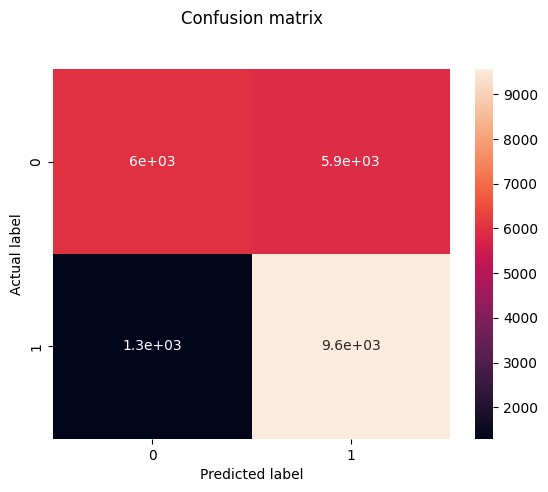

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test,y_test_predicted)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
print("The Accuracy of Model is : ",metrics.accuracy_score(Y_test, y_test_predicted))

The Accuracy of Model is :  0.6837689435537009


In [77]:
cnf_matrix

array([[6007, 5903],
       [1296, 9559]], dtype=int64)

In [78]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]


print("\nTrue Positives : ",cnf_matrix[0][0])
print("\nFalse Positives : ",cnf_matrix[0][1])
print("\nFalse Negatives : ",cnf_matrix[1][0])
print("\nTrue Negatives : ",cnf_matrix[1][1])


print("\n Accuracy : ",metrics.accuracy_score(Y_test,y_test_predicted))

print()
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predicted))


True Positives :  6007

False Positives :  5903

False Negatives :  1296

True Negatives :  9559

 Accuracy :  0.6837689435537009

              precision    recall  f1-score   support

           0       0.82      0.50      0.63     11910
           1       0.62      0.88      0.73     10855

    accuracy                           0.68     22765
   macro avg       0.72      0.69      0.68     22765
weighted avg       0.73      0.68      0.67     22765



In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_res,Y_res)

RandomForestClassifier()

In [80]:
y_pred = rf.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))
print(f1_score(Y_test,y_pred))

[[7843 4067]
 [1886 8969]]
0.7385020865363496
0.7508266711313882


In [82]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72     11910
           1       0.69      0.83      0.75     10855

    accuracy                           0.74     22765
   macro avg       0.75      0.74      0.74     22765
weighted avg       0.75      0.74      0.74     22765



In [84]:
input_data = (500001101,3,2,1,2,9,2,9.0,4,9,1,2,1,0.0,7000,2,4,1,330.315,660.63,0.5)
# Change the input data to a numpy array
numpy_data= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = model.predict (input_reshaped)
if (prediction[0]== 0):  
    print ("Not under povertyline")
else:  
    print ("Under povertyline")

Under povertyline


In [85]:
#Saving the trained model
import pickle
filename = 'rand_model.sav'
#dump=save your trained model
pickle.dump (model,open (filename,'wb'))
#loading the saved model
loaded_model = pickle.load (open ('rand_model.sav','rb'))